## Exercise 9.18

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# roc curve and auc

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer,load_digits,load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


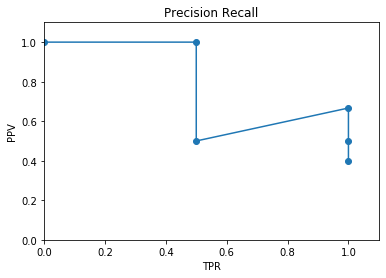

In [40]:
tests = np.array([1,1,0,1,0])
taos = np.array([x for x in np.linspace(0,1,6, endpoint=True)])



ppv = [1,1,.5,2/3,.5,2/5]
tpr = [0,.5,1/2,1,1,1]

# for t in range(len(taos)):
#     ppv.append(sum(np.ones(len(tests[t:])) == tests[t:])/(len(tests[t:]) if len(tests[t:]) > 0 else 1))
#     tpr.append(sum(np.ones(len(tests[t:])) == tests[t:])/sum(tests))
    
    

plt.plot(tpr,ppv,"o-")
plt.title("Precision Recall")
plt.xlabel("TPR")
plt.ylabel("PPV")
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.show()
    

## Exercise 9.19

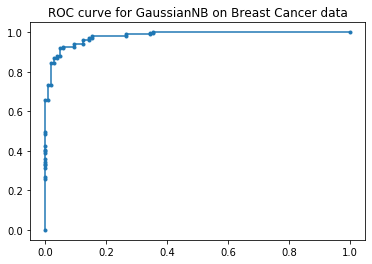

AUC score of: 0.9812698412698412


In [53]:
X,y = load_breast_cancer(return_X_y = True)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5)

gus = GaussianNB()
gus.fit(trainX,trainy)


predictions = gus.predict_proba(testX)
gaussfpr,gausstpr,_ = roc_curve(testy,predictions[:,1])
plt.plot(gaussfpr,gausstpr,marker='.', label='GaussianNB')
plt.title("ROC curve for GaussianNB on Breast Cancer data")
plt.show()
print("AUC score of: {}".format(roc_auc_score(testy,predictions[:,1])))

/home/ethan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


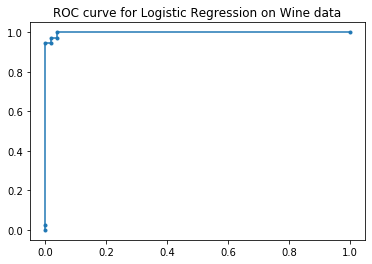

AUC score of: 0.9984407484407485


In [51]:
X,y = load_wine(return_X_y = True)
y = y==1
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5)

gus = LogisticRegression()
gus.fit(trainX,trainy)


predictions = gus.predict_proba(testX)

gaussfpr,gausstpr,_ = roc_curve(testy,predictions[:,1])

plt.plot(gaussfpr,gausstpr,marker='.', label='LR')
plt.title("ROC curve for Logistic Regression on Wine data")
plt.show()
print("AUC score of: {}".format(roc_auc_score(testy,predictions[:,1])))

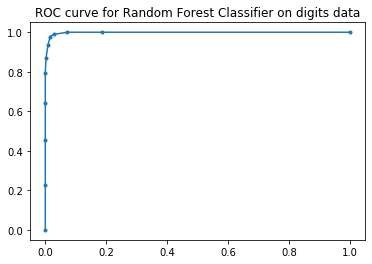

AUC score of: 0.9982153440008621


In [52]:
X,y = load_digits(return_X_y = True)
y = y==1
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5)

gus = RandomForestClassifier(n_estimators=10, random_state=42)
gus.fit(trainX,trainy)


predictions = gus.predict_proba(testX)

gaussfpr,gausstpr,_ = roc_curve(testy,predictions[:,1])

plt.plot(gaussfpr,gausstpr,marker='.', label='Randomforest')
plt.title("ROC curve for Random Forest Classifier on digits data")
plt.show()
print("AUC score of: {}".format(roc_auc_score(testy,predictions[:,1])))

## Exercise 9.20

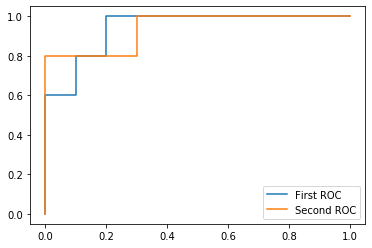

In [76]:
#The idea is that we have two different ROC curves that have the same area under the curve and have one that favors
#having a false positive and one that favors having a false negative
#doing this means if they differ by two points, we have the same area underneath and different expected loss
#since the loss on a false positive is more than on a false negative
x = [1,1,1,0,1,1,0,1,1]

# tpr = [0,0,0,2/5,2/5,3/5,3/5,4/5,4/5,1]
# tpr2 = [0,0,0,2/5,2/5,2/5,2/5,1,1,1]
# fpr = [0,0,0,0,1/10,2/10,3/10,1,1,1]
# fpr2 = [0,0,0,0,1/10,2/10,3/10,3/10,1,1]
x = [0,0,.1,.1,.2,.2,.3,.3,.4,.4,1,1]
y = [0,3/5,3/5,4/5,4/5,1,1,1,1,1,1,1]
y2= [0,4/5,4/5,4/5,4/5,4/5,4/5,1,1,1,1,1]
plt.plot(x,y,label="First ROC")
plt.plot(x,y2,label="Second ROC")
plt.gca().legend()
plt.show()